# Logistic map
## Hard Level

ISU: 502552  
N = 502552 mod 5 = 2  
Вариант функции: $g(x_n) = r x_n (1-x_n)^2$, $r \in [0; \frac{27}{4}]$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
def logistic_map(x, r):
    """Логистическое отображение: x_{n+1} = r*x_n*(1-x_n)"""
    return r * x * (1 - x)

def variant_map(x, r):
    """Отображение из варианта: g(x) = r*x*(1-x)^2"""
    return r * x * (1 - x)**2

def generate_sequence(x0, r, num_steps, map_func=logistic_map):
    """Генерирует последовательность из отображения"""
    x_seq = [x0]
    x = x0
    for _ in range(num_steps - 1):
        x = map_func(x, r)
        x_seq.append(x)
    return np.array(x_seq)

# Hard:

## 1. Положим $r_\infty \approx 3.5699456$. Как изменяется длина цикла при $r \in (3; r_\infty)$?

При r = 3 получается цикл длины 2

При увеличении параметра r от 3 до $r_\infty$ период цикла удваивается каждый раз.

Это означает, что длина цикла последовательно увеличивается: $1 \to 2 \to 4 \to 8 \to 16 \to 32 \to ...$

Исследую это численно

In [11]:
def find_period(x0, r, max_iterations=3000, settle_time=1000, tolerance=1e-6, map_func=logistic_map):
    """
    Находит период цикла для заданного r.
    Возвращает -1 если система хаотична (период не обнаружен).
    """
    seq = generate_sequence(x0, r, max_iterations, map_func)
    seq_stable = seq[settle_time:]  # Пропускаем переходный процесс
    seq_stable = np.round(seq_stable / tolerance) * tolerance  # Округляем
    
    unique_vals = np.unique(seq_stable)
    if len(unique_vals) > 100:  # если слишком много уникальных значений, то приходим к хаосу
        return -1
    
    # Ищем период
    for period in range(1, min(200, len(seq_stable) // 2)):
        is_periodic = True
        for i in range(len(seq_stable) - period):
            if abs(seq_stable[i] - seq_stable[i + period]) > tolerance:
                is_periodic = False
                break
        if is_periodic:
            return period
    
    return -1

r_infinity = 3.5699456
r_values = np.linspace(3.0, r_infinity, 1000) # генерируем 1000 точек от 3 до р_инфинити
periods = []

for r in r_values:
    period = find_period(0.4, r)
    periods.append(period)

periods = np.array(periods)

unique_periods = []
r_bifurcations = [] # бифуракции

for i in range(len(periods)):
    if i == 0 or periods[i] != periods[i-1]:
        if periods[i] not in unique_periods and periods[i] > 0:
            unique_periods.append(periods[i])
            r_bifurcations.append(r_values[i])

print("Каскад удвоения периода:")
print("Период | Приближенное значение r")
print("-" * 40)
for period, r in zip(unique_periods[:10], r_bifurcations[:10]):
    print(f"{period} | r ≈ {r:.7f}")

Каскад удвоения периода:
Период | Приближенное значение r
----------------------------------------
2 | r ≈ 3.0051346
4 | r ≈ 3.4518488
8 | r ≈ 3.5454134
16 | r ≈ 3.5648110
32 | r ≈ 3.5693751


## 2. Для $r \in (3; r_\infty)$ экспериментально установите, какие ограничения действуют на $m$?

**Вывод:** Как видно из результатов выше, длина цикла $m$ может принимать только значения, являющиеся **степенями двойки**: $m = 2^k$, где $k \in \mathbb{N}_0$.

То есть возможны циклы длины: $1, 2, 4, 8, 16, 32, 64, 128, ...$

Это фундаментальное свойство **маршрута к хаосу через удвоение периода** (period-doubling route to chaos), открытое Митчеллом Фейгенбаумом.

При $r = r_\infty$ система переходит в хаотический режим.

# Hard:

## Напишите функцию, которая для заданного параметра $r$ строит лестницу Ламерея.

Лестница Ламерея (или диаграмма-паутинка, cobweb diagram) - это графический метод визуализации сходимости к неподвижной точке или циклу.

Алгоритм построения:
1. От точки $(x_0, 0)$ двигаемся вертикально к кривой $y=f(x)$, получаем $(x_0, x_1)$
2. Горизонтально переходим к диагонали $y=x$, получаем $(x_1, x_1)$
3. Вертикально к кривой: $(x_1, x_2)$
4. Повторяем шаги 2-3

In [12]:
def lamerey_ladder(x0, r, num_iterations=50, map_func=logistic_map, ax=None):
    """
    Строит лестницу Ламерея для заданного отображения.
    
    Параметры:
    - x0: начальное значение
    - r: параметр
    - num_iterations: количество итераций
    - map_func: функция отображения
    - ax: matplotlib axis (если None, создается новая фигура)
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    x = np.linspace(0, 1, 500) # график - 500 точекй
    y = map_func(x, r)
    ax.plot(x, y, 'b-', linewidth=2, label=f'$f(x)$, r={r}')
    
    # Диагональ y=x
    ax.plot(x, x, 'k--', linewidth=1.5, label='$y=x$')
    
    # Лестницу
    x_current = x0
    x_points = [x_current]
    y_points = [0]
    
    for i in range(num_iterations):
        # Вертикальная линия к кривой
        y_next = map_func(x_current, r)
        x_points.extend([x_current, x_current])
        y_points.extend([y_points[-1], y_next])
        
        # Горизонтальная линия к диагонали
        x_points.extend([x_current, y_next])
        y_points.extend([y_next, y_next])
        
        x_current = y_next
        
        if x_current < 0 or x_current > 1:
            break
    
    # Рисуем лестницу
    ax.plot(x_points, y_points, 'r-', linewidth=0.8, alpha=0.7, label='Лестница Ламерея')
    ax.plot(x0, 0, 'go', markersize=10, label=f'$x_0={x0}$')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x_n$', fontsize=14)
    ax.set_ylabel('$x_{n+1}$', fontsize=14)
    ax.set_title(f'Лестница Ламерея для r={r}', fontsize=16)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    return ax

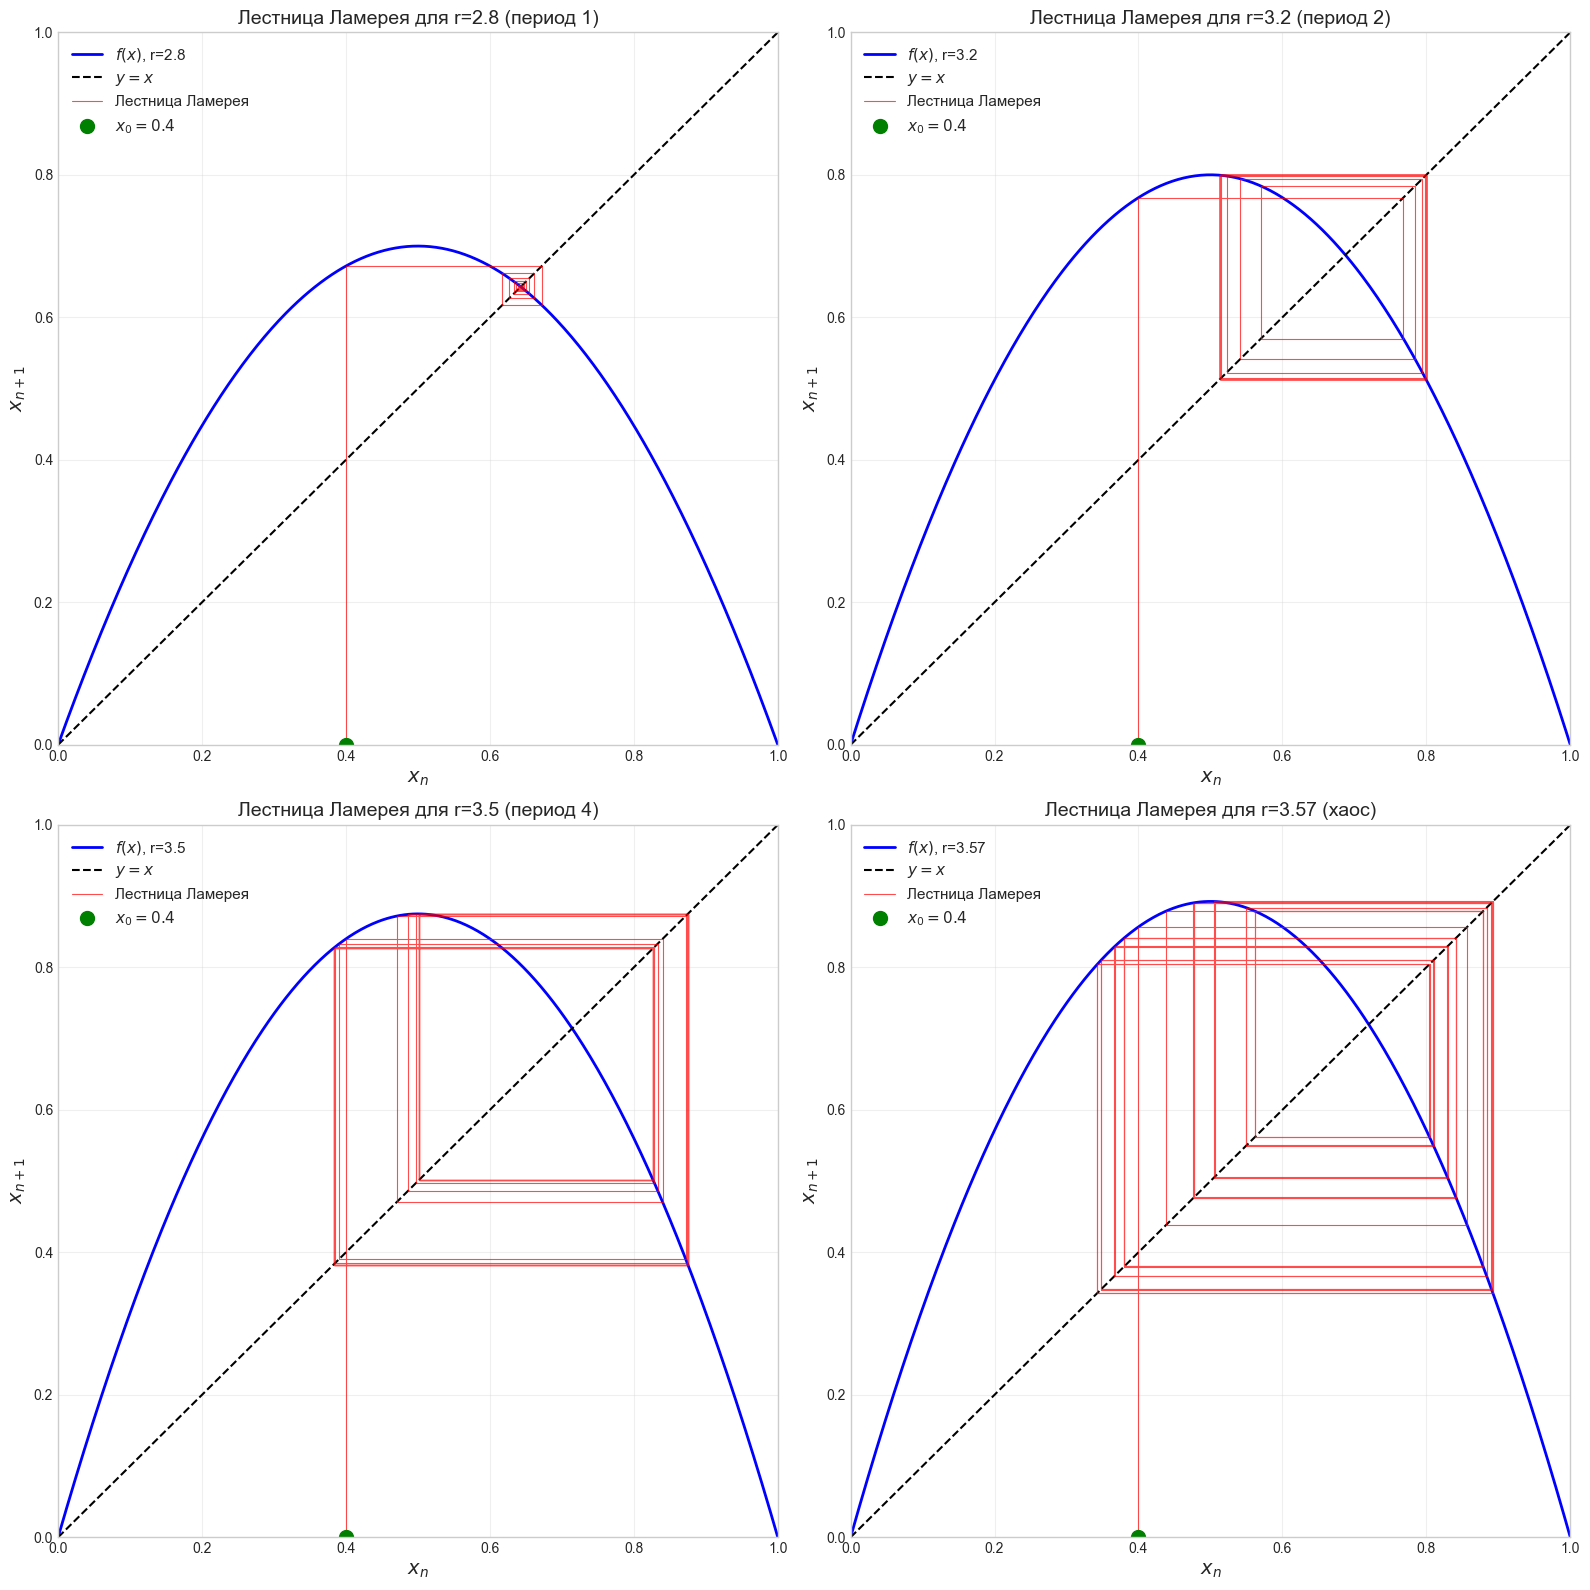

In [13]:
# лестница Ламерея для разных значений r
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

test_r_values = [2.8, 3.2, 3.5, 3.57]
x0 = 0.4

for i, r in enumerate(test_r_values):
    lamerey_ladder(x0, r, num_iterations=40, ax=axes[i])
    period = find_period(x0, r)
    if period > 0:
        axes[i].set_title(f'Лестница Ламерея для r={r} (период {period})', fontsize=14)
    else:
        axes[i].set_title(f'Лестница Ламерея для r={r} (хаос)', fontsize=14)

plt.tight_layout()
plt.show()

## Сделайте выводы: как выглядят циклы различных порядков на графике?

**Выводы:**

1. **Цикл порядка 1** (неподвижная точка, $r=2.8$):
   - Лестница сходится к точке пересечения кривой $f(x)$ и диагонали $y=x$
   - Образуется сходящаяся спираль
   
2. **Цикл порядка 2** ($r=3.2$):
   - Лестница образует **прямоугольник**
   - Система колеблется между двумя значениями
   
3. **Цикл порядка 4** ($r=3.5$):
   - Образуется более сложная замкнутая фигура с 4 "углами"
   - Траектория проходит через 4 различных значения
   
4. **Цикл порядка 8, 16, 32...** ($r$ близко к $r_\infty$):
   - Замкнутые кривые становятся все более сложными
   - Количество "углов" соответствует порядку цикла
   
5. **Хаотический режим** ($r > r_\infty$):
   - Лестница заполняет некоторую область, не образуя замкнутой траектории
   - Траектория никогда не повторяется


# Hard:

## Исследуйте: как изменяется длина цикла заданного вариантом отображения $g(x_n)$ с изменением параметра $r$? Постройте соответствующие графики. Есть ли сходства с логистическим отображением?

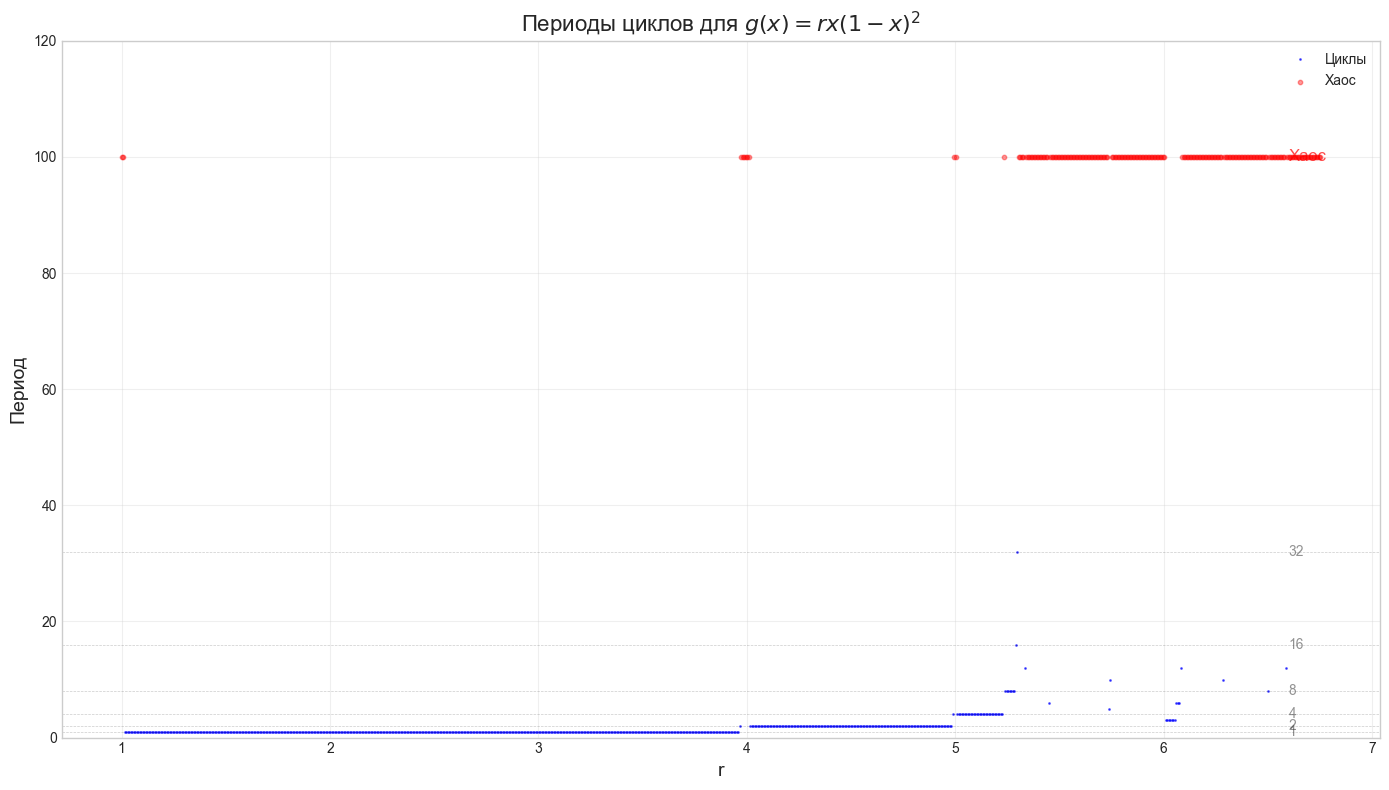

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# отображение
def variant_map(x, r):
    return r * x * (1 - x)**2

def find_period(x0, r, map_func, max_iterations=3000, settle_time=1000, tol=1e-8):
    x = x0
    values = []
    for _ in range(settle_time):
        x = map_func(x, r)
    for _ in range(max_iterations):
        x = map_func(x, r)
        values.append(round(x, 8))
    for p in range(1, 101):
        if values[:p] == values[p:2*p]:
            return p
    return -1  # хаос

r_test = np.linspace(1.0, 6.75, 800)
periods_variant = []

for r in r_test:
    period = find_period(0.4, r, variant_map)
    periods_variant.append(period)

periods_variant = np.array(periods_variant, dtype=float)

# график
plt.figure(figsize=(14, 8))
is_chaos = (periods_variant == -1)
periods_plot_display = periods_variant.copy()
periods_plot_display[is_chaos] = np.nan

plt.plot(r_test, periods_plot_display, 'b.', markersize=2, alpha=0.6, label='Циклы')
plt.scatter(r_test[is_chaos], [100] * np.sum(is_chaos), color='r', s=10, alpha=0.4, label='Хаос')

plt.xlabel('r', fontsize=14)
plt.ylabel('Период', fontsize=14)
plt.title('Периоды циклов для $g(x) = rx(1-x)^2$', fontsize=16)
plt.ylim(0, 120)
plt.grid(True, alpha=0.3)
for p in [1, 2, 4, 8, 16, 32]:
    plt.axhline(y=p, color='k', linestyle='--', alpha=0.2, linewidth=0.5)
    plt.text(6.6, p, f'{p}', fontsize=10, alpha=0.5, verticalalignment='center')
plt.text(6.6, 100, 'Хаос', fontsize=12, color='r', alpha=0.7, verticalalignment='center')
plt.legend()
plt.tight_layout()
plt.show()


## Сравнение с логистическим отображением

**Сходства:**

1. **Каскад удвоения периода:** Оба отображения демонстрируют маршрут к хаосу через удвоение периода: $1 \to 2 \to 4 \to 8 \to 16 \to ...$

2. **Переход к хаосу:** После последовательности удвоений периода оба отображения переходят в хаотический режим

3. **Окна периодичности:** В хаотической области могут наблюдаться "окна" с регулярным поведением (например, цикл периода 3)

4. **Универсальность:** Оба отображения принадлежат к классу унимодальных отображений и следуют универсальным закономерностям Фейгенбаума

**Различия:**

1. **Форма функции:** 
   - Логистическое: $f(x) = rx(1-x)$ - симметричная парабола с максимумом в $x=0.5$
   - Вариант: $g(x) = rx(1-x)^2$ - несимметричная кубическая функция с максимумом в $x=1/3$

2. **Диапазон параметра:**
   - Логистическое: $r \in [0, 4]$
   - Вариант: $r \in [0, 6.75]$ - больший диапазон

3. **Скорость перехода к хаосу:** Из-за несимметричной формы функции варианта, бифуркации могут происходить при других значениях $r$

4. **Множитель $(1-x)^2$** в варианте усиливает влияние "перенаселения" при больших $x$, что может привести к более резким изменениям динамики

**Вывод:** Несмотря на различия в конкретных формулах, оба отображения демонстрируют качественно схожую динамику, что подтверждает **универсальность** свойств хаотических систем, описанную в теории Фейгенбаума.